# Restaurant Food Cost DataSet 




Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

Size of training set: 12,690 records

Size of test set: 4,231 records



Size of training set: 12,690 records

Size of test set: 4,231 records

FEATURES:

>TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

>RESTAURANT_ID: A unique ID for each restaurant.

>CUISINES: The variety of cuisines that the restaurant offers.

>TIME: The open hours of the restaurant.

>CITY: The city in which the restaurant is located.

>LOCALITY: The locality of the restaurant.

>RATING: The average rating of the restaurant by customers.

>VOTES: The overall votes received by the restaurant.

>COST: The average cost of a two-person meal.

This is Regression kind of problem

In [2]:
# = Importing Basic Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [3]:
# = Loading Train Data
df_train=pd.read_excel("C:/Users/HP/AppData/Local/Packages/WinZipComputing.WinZipUniversal_3ykzqggjzj4z0/TempState/tmp_unzipped/z637457034727690066/z20210108-121017/Data_Train.xlsx")
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
# = Loading Test Data
df_test=pd.read_excel("C:/Users/HP/AppData/Local/Packages/WinZipComputing.WinZipUniversal_3ykzqggjzj4z0/TempState/tmp_unzipped/z637457034727690066/z20210108-121440/Data_Test.xlsx")
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [5]:
# = checking types of train data
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [6]:
# = checking null values
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

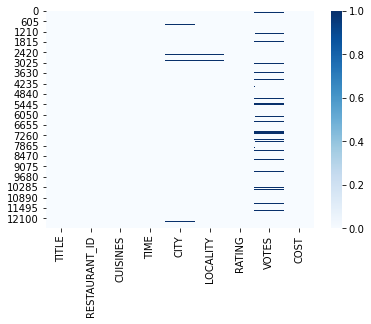

In [7]:
# = ploting null values
sns.heatmap(df_train.isnull(),cmap="Blues")

In [8]:
# see columns
df_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [9]:
#checking fequancy of all columns

for col in df_train.columns:
    print("---------------(",col,")---------------")
    print(df_train[col].unique())
    print(df_train[col].value_counts())
    print("\n")

---------------( TITLE )---------------
['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL 

obsevations

> mode of column city is Chennai(2174).

> mode of column Locality is Gachibowli(166).

> mode of column Rating is 3.9(1238) and this column also contain 'NEW' and '-'.

> mode of column Votes is '44 votes'(71).

In [10]:
# impute value with nulls.
df_train["CITY"]=df_train["CITY"].replace(np.NaN,'Chennai')
df_train["LOCALITY"]=df_train["LOCALITY"].replace(np.NaN,"Gachibowli")
df_train["RATING"]=df_train["RATING"].replace(np.NaN,"3.9")
df_train["RATING"]=df_train["RATING"].replace({'NEW':'3.9','-':'3.9'})
df_train["VOTES"]=df_train["VOTES"].replace(np.NaN,"44 votes")

# = CHANGING TYPES OF COLUMN
df_train["RATING"]=df_train["RATING"].astype(float)


In [11]:
# checking null values after imputing
print(df_train.isnull().sum())
print(df_train.dtypes)

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64
TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES             object
COST               int64
dtype: object


##  Summary Statatistic

In [12]:
df_train.describe()

,RESTAURANT_ID,RATING,COST
count,12690.000000,12690.000000,12690.000000
mean,7759.134121,3.796320,655.252246
std,4504.874150,0.402966,627.003540
min,0.000000,2.000000,20.000000
25%,3863.250000,3.600000,300.000000
50%,7740.000000,3.900000,500.000000
75%,11688.750000,4.000000,800.000000
max,15573.000000,4.900000,14000.000000


> very high standard deviation value(627.0035) of column COST.

> min and max cost is 20 and 14000.

## Data Visualiztion

In [13]:
# = dataset
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


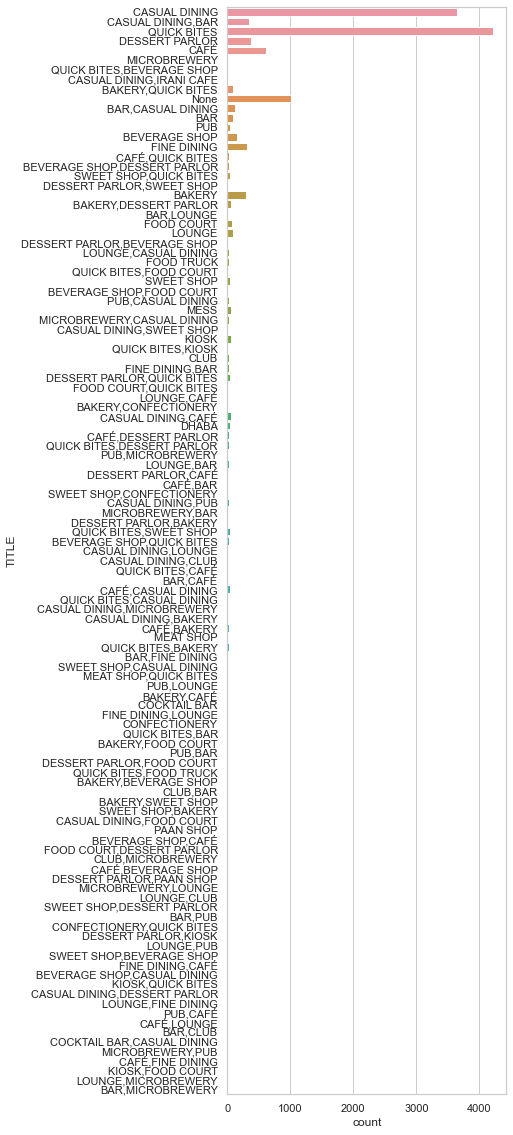

In [14]:
# plot  title
plt.figure(figsize=(5,20))
sns.set(style="whitegrid")
sns.countplot(y="TITLE",data=df_train)
plt.show()

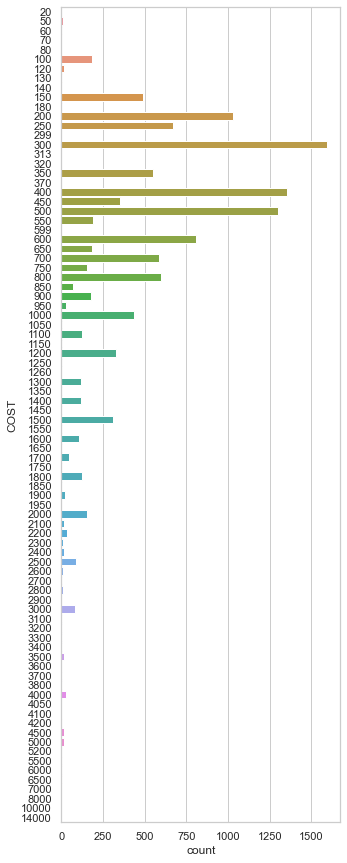

In [15]:
# = see cost counts
plt.figure(figsize=(5,15))
sns.set(style="whitegrid")
sns.countplot(y="COST",data=df_train)
plt.show()

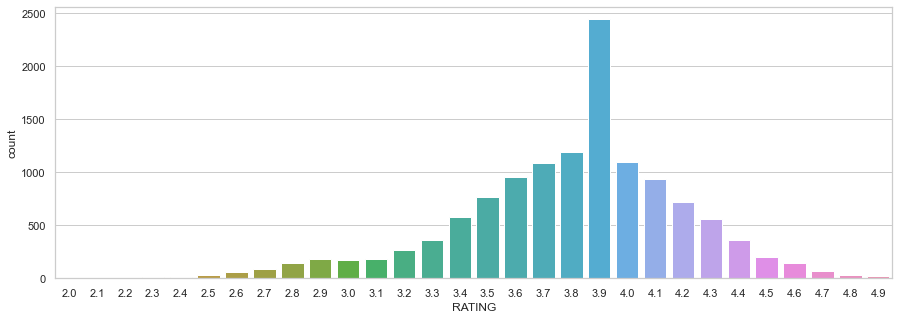

In [16]:
# = see Rating counts
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.countplot(x="RATING",data=df_train)
plt.show()

In [17]:
df_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [18]:
# = Converting into Numeric Categories 
columns=["TITLE",'CUISINES','TIME','CITY','LOCALITY','VOTES']
for col in columns:
    df_train[col]=pd.factorize(df_train[col])[0]

In [19]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0,9438,0,0,0,0,3.6,0,1200
1,1,13198,1,1,1,1,4.2,1,1500
2,0,10915,2,2,1,2,3.8,2,800
3,2,6346,3,3,2,3,4.1,3,800
4,3,15387,4,4,2,4,3.8,4,300


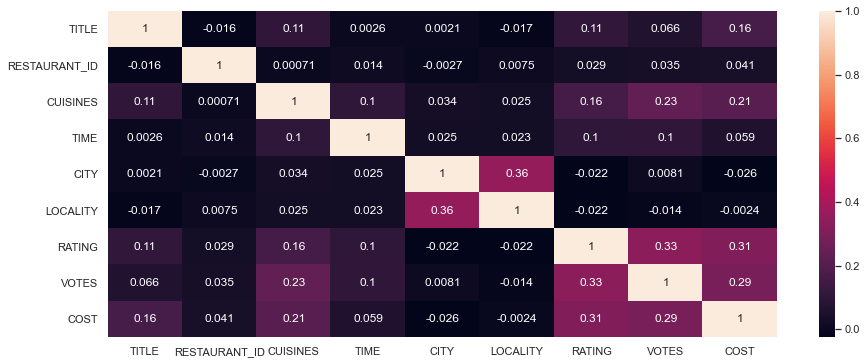

In [20]:
#ploting correlation with heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

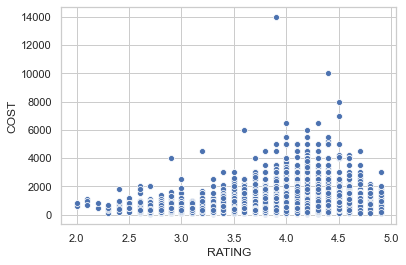

In [21]:
# scatter between rating and cost
sns.scatterplot(x="RATING",y="COST",data=df_train)

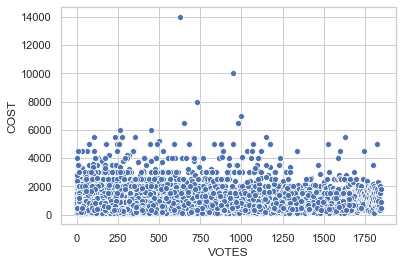

In [22]:
# scatter b/w votes and cost 
sns.scatterplot(x="VOTES",y="COST",data=df_train)

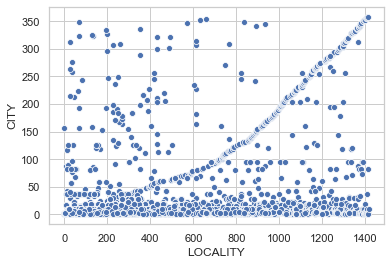

In [23]:
#scatter b/w locality and city
sns.scatterplot(x="LOCALITY",y="CITY",data=df_train)

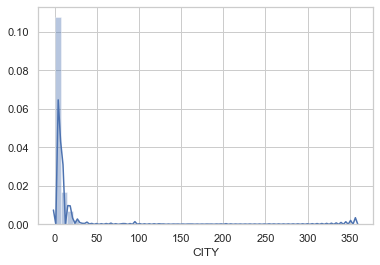

In [24]:
sns.distplot(df_train["CITY"])

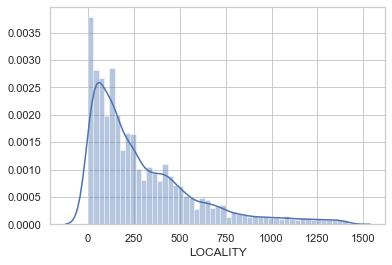

In [25]:
sns.distplot(df_train["LOCALITY"])

## CHECKING OUTLIERS 

TITLE


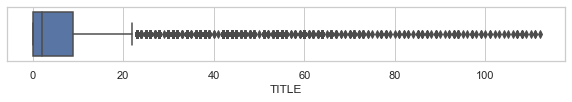

RESTAURANT_ID


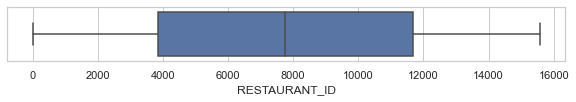

CUISINES


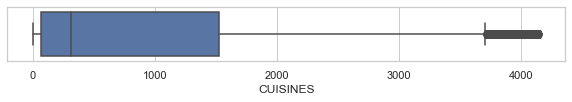

TIME


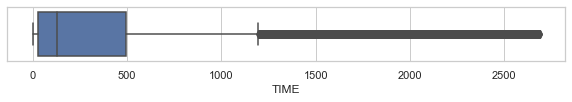

CITY


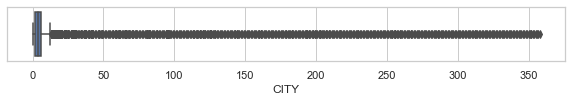

LOCALITY


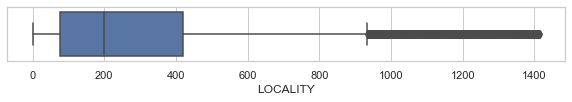

RATING


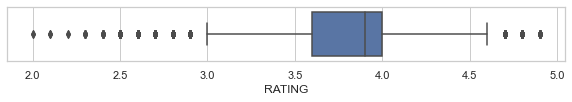

VOTES


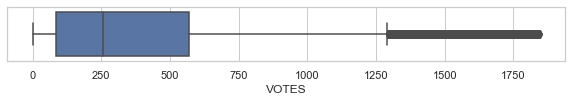

COST


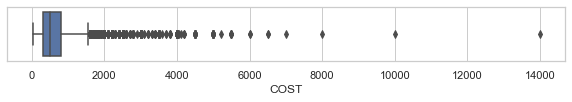

In [26]:
# = checking outliers with boxplot
for i in df_train.columns:
    print(i)
    plt.figure(figsize=(10,1))
    sns.boxplot(df_train[i])
    plt.show()

In [27]:
# = Removing outliers
z=np.abs(zscore(df_train))
print(np.where(z>3))

train=df_train[(z<3).all(axis=1)]
print(train.shape)
print(df_train.shape)

(array([   84,   159,   208, ..., 12683, 12686, 12686], dtype=int64), array([8, 6, 8, ..., 7, 3, 7], dtype=int64))
(11192, 9)
(12690, 9)


## Checking Skewness 

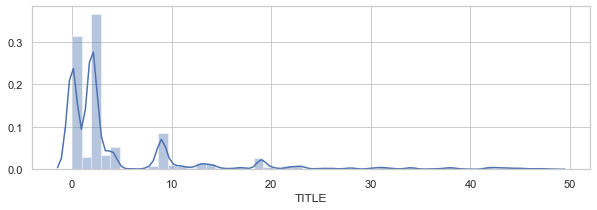

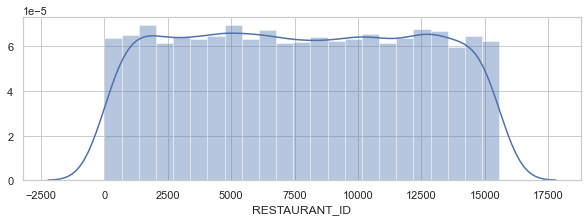

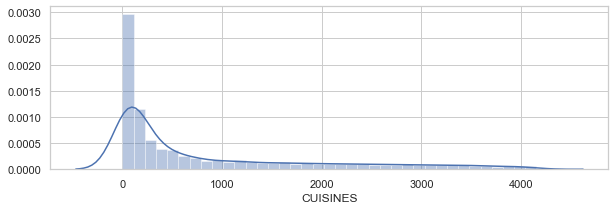

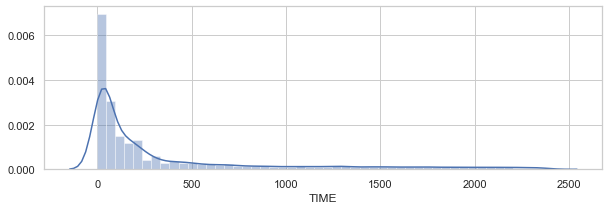

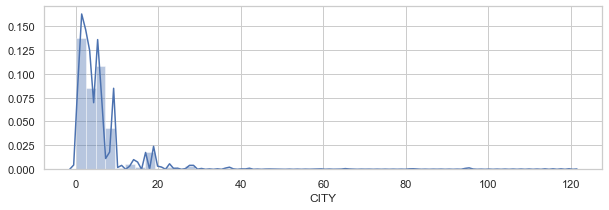

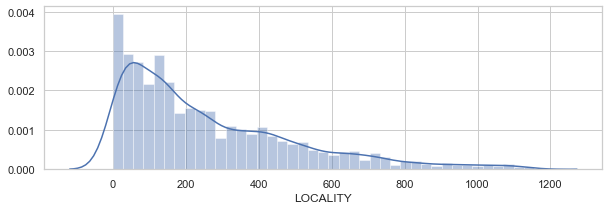

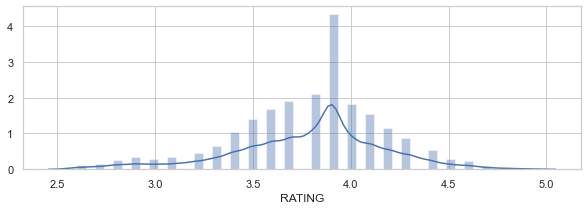

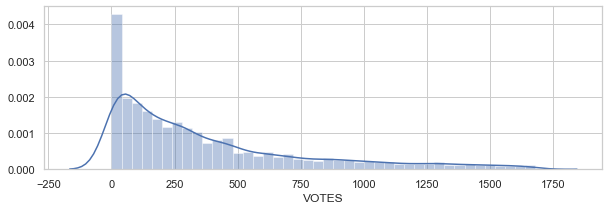

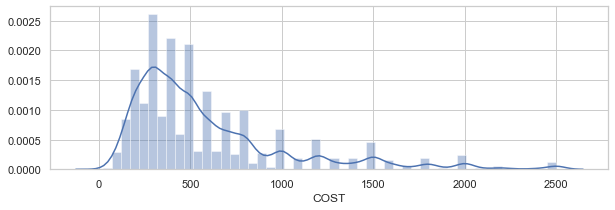

In [28]:
# = checking skewness with distribution plot
for i in train.columns:
    plt.figure(figsize=(10,3))
    sns.distplot(train[i])
    plt.show()

In [29]:
# ckecking skewness
train.skew()

TITLE            2.673546
RESTAURANT_ID    0.009149
CUISINES         1.365598
TIME             1.903986
CITY             6.114560
LOCALITY         1.261661
RATING          -0.490475
VOTES            1.376491
COST             1.821502
dtype: float64

In [30]:
# treating skewness
for i in train.columns:
    if train[i].skew()>.55:
        train[i]=np.log1p(train[i])

In [31]:
train.skew()

TITLE            0.642461
RESTAURANT_ID    0.009149
CUISINES        -0.266930
TIME             0.101949
CITY             0.895209
LOCALITY        -0.904037
RATING          -0.490475
VOTES           -0.790181
COST             0.177654
dtype: float64

## Trainning Data 

In [32]:
# impoprt training libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


#import model boosting libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,max_error,accuracy_score,confusion_matrix,classification_report 

In [33]:
#selecting data
X=train.drop("COST",axis=1)
y=train["COST"]

In [34]:
# useing standard scaler
sc=StandardScaler()
x=sc.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-1.133122,0.374401,-3.119920,-2.877110,-2.136588,-4.093340,-0.482331,-3.524898
1,-0.474302,1.210582,-2.733174,-2.457709,-1.218891,-3.529725,1.063855,-3.054201
2,-1.133122,0.702869,-2.506942,-2.212376,-1.218891,-3.200031,0.033064,-2.778860
3,-0.088918,-0.313225,-2.346428,-2.038309,-0.682073,-2.966110,0.806157,-2.583503
4,0.184517,1.697391,-2.221924,-1.903292,-0.682073,-2.784666,0.033064,-2.431973


In [35]:
#spliting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=42)
print(x_train.shape)
print(y_train.shape)

(8617, 8)
(8617,)


In [36]:
models=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]

#creating loop for all algorithm
for i in models:
    print("-------------------------",i,"-------------------------")
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("R2:",r2_score(y_test,pred))
    print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))
    print("max_e:",max_error(y_test,pred))
    print("score:",i.score(x_train,y_train))
    print("\n")

------------------------- LinearRegression() -------------------------
R2: 0.21824311038265543
RSME: 0.6007196834157963
max_e: 2.459669540224277
score: 0.23366145496258917


------------------------- SVR() -------------------------
R2: 0.3766006694398929
RSME: 0.5364375490092159
max_e: 2.4177781315935882
score: 0.4554817038032233


------------------------- DecisionTreeRegressor() -------------------------
R2: 0.21724659599998553
RSME: 0.6011024335809295
max_e: 2.9862818177424737
score: 1.0


------------------------- KNeighborsRegressor() -------------------------
R2: 0.30552799101278716
RSME: 0.5661915411457769
max_e: 2.7764651439807997
score: 0.5398137408514836


------------------------- AdaBoostRegressor() -------------------------
R2: 0.42465311313444587
RSME: 0.5153483471809154
max_e: 1.997645212798854
score: 0.42983295001362887


------------------------- RandomForestRegressor() -------------------------
R2: 0.6083875024811579
RSME: 0.42517162722324225
max_e: 1.887294112139163


## Useing Cross Validation Score

In [37]:
# useing cross validation score
for c in models:
    print("-------",c)
    cross=cross_val_score(c,x,y,cv=6)
    print(cross.mean())
    print(cross)
    print("\n")

------- LinearRegression()
0.22620333853681754
[0.17188443 0.22015183 0.24618557 0.23222269 0.2653207  0.22145481]


------- SVR()
0.3686870214857143
[0.31943138 0.36487246 0.39760819 0.35655315 0.40426794 0.36938901]


------- DecisionTreeRegressor()
0.23243970601994782
[0.25159174 0.26868393 0.18119096 0.25437388 0.23550286 0.20329487]


------- KNeighborsRegressor()
0.30682893564673547
[0.24625395 0.29756766 0.33993731 0.31729774 0.3218299  0.31808705]


------- AdaBoostRegressor()
0.40852242546647477
[0.333064   0.42368607 0.46403124 0.41447117 0.40552981 0.41035226]


------- RandomForestRegressor()
0.6078453810310339
[0.57998577 0.61356091 0.61960337 0.60277308 0.61556098 0.61558818]


------- GradientBoostingRegressor()
0.6011722091982153
[0.56163197 0.60952027 0.61306203 0.60418528 0.60912713 0.60950657]




In [38]:
#chooseing best model
max_ac=0

for r in range(40,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.25)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    predr=rf.predict(x_test)
    ac=r2_score(y_test,predr)
    if ac>max_ac:
        max_ac=ac
        final_r=r
print("r2_score =",max_ac,"from random_state =",final_r)
print("RSME:",np.sqrt(mean_squared_error(y_test,predr)))

r2_score = 0.6556646638154817 from random_state = 129
RSME: 0.4177508556212754


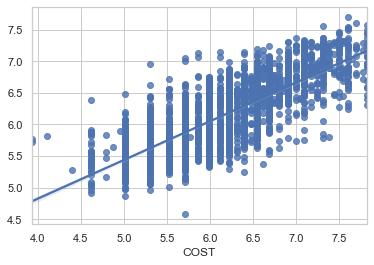

In [39]:
# ploting predict value and actual value
sns.regplot(y_test,predr)
plt.show()

In [40]:
# saveing best model
import joblib

joblib.dump(rf,"Restaurant_food_cost.pkl")

['Restaurant_food_cost.pkl']